In [5]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [4]:
# Read in the california housing data set
cali_housing_df = pd.read_csv("../Resources/California_Housing.csv")
cali_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


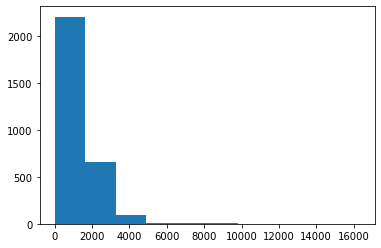

median = 1152.5


In [45]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(cali_housing_df["Population"])
plt.show()
population_median = np.median(cali_housing_df["Population"])
print("median = " + str(population_median))

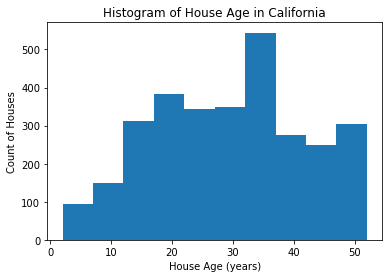

This is not normally distributed.


In [49]:
# Determine if the house age in California is considered normally distributed

plt.hist(cali_housing_df["HouseAge"])
plt.title("Histogram of House Age in California")
plt.xlabel("House Age (years)")
plt.ylabel("Count of Houses")
plt.show()

stat, p = sts.normaltest(cali_housing_df["HouseAge"])

if p > 0.05:
    print("This is normally distributed. p = " + str(p))
else: 
    print("This is not normally distributed.")

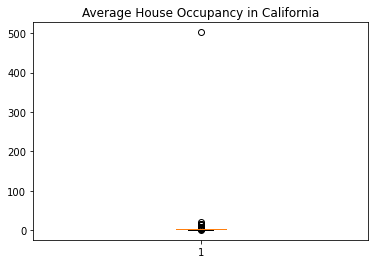

There are quite a few outliers in average occupancy, and one significant outlier.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [51]:
# Determine if there are any potential outliers in the average occupancy in California
plt.boxplot(cali_housing_df["AveOccup"])
plt.title("Average House Occupancy in California")
plt.show()

print("There are quite a few outliers in average occupancy, and one significant outlier.")

quantiles = cali_housing_df["AveOccup"].quantile([.25,.5,.75])
upper_bound = quantiles[.75] + (1.5 * (quantiles[.75]-quantiles[.25]))
lower_bound = quantiles[.25] - (1.5 * (quantiles[.75]-quantiles[.25]))

outliers = cali_housing_df.loc[(cali_housing_df["AveOccup"]>upper_bound) |  (cali_housing_df["AveOccup"]<lower_bound),:]
outliers

In [37]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?

min_income = outliers["MedInc"].min()
max_income = outliers["MedInc"].max()

print(f"The lowest median income of the outliers is {min_income}, and the highest median income of the outliers is {max_income}.")

The lowest median income of the outliers is 0.716, and the highest median income of the outliers is 15.0001.


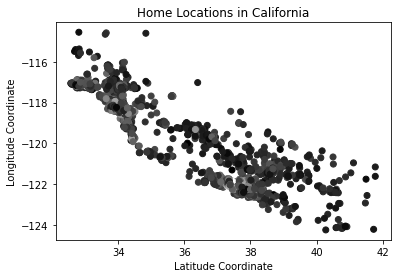

In [43]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.

plt.scatter(cali_housing_df["Latitude"], cali_housing_df["Longitude"],c=cali_housing_df["MedInc"],cmap="gray")
plt.title("Home Locations in California")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Longitude Coordinate")
plt.show()

